<a href="https://colab.research.google.com/github/chamikasudusinghe/nocml/blob/master/fft_r3-balanced.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Module Imports for Data Fetiching and Visualization



In [0]:
import time
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Module Imports for Data Processing

In [0]:
from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.manifold import TSNE

Importing Dataset from GitHub

Train Data

In [0]:
df = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%201.1/router-data/r3/2-fft-normal-n-0-3-r3.csv?token=AKVFSOGV32UXUS6DMR67GU26ZLJ4S')
print(df.shape)
df

(77850, 30)


,timestamp,outport,inport,cache_coherence_type,flit_id,flit_type,vnet,vc,src_ni,src_router,dst_ni,dst_router,traversal_id,hop_count,current_hop,hop_percentage,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,packet_max_index,port_index,cache_coherence_flit_index,flit_index,traversal_index,cache_coherence_vnet_index,vnet_vc_index,vnet_vc_cc_index,target
0,7,1,0,1,1,4,3,9,3,3,23,7,2,1,0,0.00,4,8,1,8,8,64,0,1,4,8,3,27,9,1
1,19,1,4,1,1,4,3,9,0,0,23,7,1,4,3,0.75,16,7,2,8,14,112,4,1,4,4,3,27,9,1
2,54,0,1,4,1,1,5,17,23,7,3,3,2,1,1,1.00,8,6,3,8,18,144,0,4,4,8,20,85,100,1
3,55,0,1,4,2,2,5,17,23,7,3,3,2,1,1,1.00,9,5,4,8,20,160,0,8,16,32,20,85,100,1
4,56,0,1,4,3,2,5,17,23,7,3,3,2,1,1,1.00,10,4,5,8,20,160,0,12,24,48,20,85,100,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77845,3269151,1,0,5,2,2,3,11,3,3,27,11,20046,2,0,0.00,11,5,2,6,10,60,0,10,20,400920,15,33,45,1
77846,3269158,1,0,5,3,2,3,11,3,3,27,11,20046,2,0,0.00,18,4,3,6,12,72,0,15,30,601380,15,33,45,1
77847,3269165,1,0,5,4,2,3,11,3,3,27,11,20046,2,0,0.00,25,3,4,6,12,72,0,20,40,801840,15,33,45,1
77848,3269172,1,0,5,5,3,3,11,3,3,27,11,20046,2,0,0.00,32,2,5,6,10,60,0,25,75,1503450,15,33,45,1


In [0]:
df1 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%201.1/router-data/r3/2-fft-malicious-n-0-3-m-1-r3.csv?token=AKVFSOED5QIMBBZMRWKL5RK6ZLJ6E', nrows=40000)
df2 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%201.1/router-data/r3/2-fft-malicious-n-0-3-m-6-r3.csv?token=AKVFSOCF2RWY4DBUWHCI2A26ZLJ6G', nrows=40000)
df3 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%201.1/router-data/r3/2-fft-malicious-n-0-3-m-9-r3.csv?token=AKVFSOE7FA4BBTXMYW2CTFS6ZLJ6K', nrows=40000)
df4 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%201.1/router-data/r3/2-fft-malicious-n-0-3-m-14-r3.csv?token=AKVFSOFHVC64J4IPRKF7MGS6ZLJ6O', nrows=40000)

df11 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%201.1/router-data/r3/2-fft-normal-n-0-5-r3.csv?token=AKVFSOAT3AG4KKVTRPRAW6S6ZLKBQ')
df12 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%201.1/router-data/r3/2-fft-normal-n-0-12-r3.csv?token=AKVFSOCKTYXLR4LPHFWFZ6S6ZLKBU')
df13 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%201.1/router-data/r3/2-fft-normal-n-0-15-r3.csv?token=AKVFSOC2RUNNPTZC6WLUU5C6ZLKBW')

In [0]:
print(df1.shape)
print(df2.shape)
print(df3.shape)
print(df4.shape)
print(df11.shape)
print(df12.shape)
print(df13.shape)

(40000, 30)
(40000, 30)
(40000, 30)
(40000, 30)
(19460, 30)
(19424, 30)
(20553, 30)


In [0]:
df = df.append(df1, ignore_index=True,sort=False)
df = df.append(df2, ignore_index=True,sort=False)
df = df.append(df3, ignore_index=True,sort=False)
df = df.append(df4, ignore_index=True,sort=False)
df = df.append(df11, ignore_index=True,sort=False)
df = df.append(df12, ignore_index=True,sort=False)
df = df.append(df13, ignore_index=True,sort=False)
df = df.sort_values('timestamp')
df.to_csv('fft-r1-train.csv',index=False)

In [0]:
df = pd.read_csv('fft-r1-train.csv')
df

,timestamp,outport,inport,cache_coherence_type,flit_id,flit_type,vnet,vc,src_ni,src_router,dst_ni,dst_router,traversal_id,hop_count,current_hop,hop_percentage,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,packet_max_index,port_index,cache_coherence_flit_index,flit_index,traversal_index,cache_coherence_vnet_index,vnet_vc_index,vnet_vc_cc_index,target
0,7,1,0,1,1,4,3,9,3,3,23,7,2,1,0,0.00,4,8,1,8,8,64,0,1,4,8,3,27,9,1
1,7,1,0,1,1,4,3,9,3,3,23,7,2,1,0,0.00,4,8,1,8,8,64,0,1,4,8,3,27,9,0
2,7,1,0,1,1,4,3,9,3,3,23,7,2,1,0,0.00,4,8,1,8,8,64,0,1,4,8,3,27,9,0
3,7,1,0,1,1,4,3,9,3,3,23,7,2,1,0,0.00,4,8,1,8,8,64,0,1,4,8,3,27,9,0
4,7,1,0,1,1,4,3,9,3,3,23,7,3,1,0,0.00,4,9,1,9,9,81,0,1,4,12,3,27,9,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297282,3273672,4,0,2,1,4,3,11,19,3,20,4,20040,4,0,0.00,32,1,1,1,1,1,0,2,8,160320,6,33,18,1
297283,3273673,1,0,7,1,4,3,12,19,3,15,15,20039,3,0,0.00,5,1,1,1,1,1,0,7,28,561092,21,36,63,1
297284,3273744,0,1,3,1,4,3,9,20,4,19,3,20040,4,4,1.00,24,1,1,1,1,1,0,3,12,240480,9,27,27,1
297285,3275116,1,4,7,1,4,3,9,17,1,15,15,20055,5,2,0.40,14,1,1,1,1,1,4,7,28,561540,21,27,63,1


In [0]:
df.shape

(297287, 30)

Test Data

In [0]:
df5 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%201.1/router-data/r3/2-fft-malicious-n-0-3-m-2-r3.csv?token=AKVFSOHR6MYZTLLLRXNNZMC6ZLKFI', nrows=30000)
df6 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%201.1/router-data/r3/2-fft-malicious-n-0-3-m-5-r3.csv?token=AKVFSODTC3WK6GTLGRX6X4C6ZLKFM', nrows=30000)
df7 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%201.1/router-data/r3/2-fft-malicious-n-0-3-m-10-r3.csv?token=AKVFSOHMNRWE653CLJJ35G26ZLKFS', nrows=30000)
df8 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%201.1/router-data/r3/2-fft-malicious-n-0-3-m-12-r3.csv?token=AKVFSOETXVMN64SRNQJMP4S6ZLKFU', nrows=30000)
df9 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%201.1/router-data/r3/2-fft-malicious-n-0-3-m-13-r3.csv?token=AKVFSOEM2I5TF47A7G65EKS6ZLKFY', nrows=30000)
df10 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%201.1/router-data/r3/2-fft-malicious-n-0-3-m-15-r3.csv?token=AKVFSOGTD7T3K67EG6N7W7S6ZLKF2', nrows=30000)

df14 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%201.1/router-data/r3/2-fft-normal-n-0-10-r3.csv?token=AKVFSOA5FZJJKBXEPARIWBK6ZLKKE', nrows=30000)
print(df5.shape)
print(df6.shape)
print(df7.shape)
print(df8.shape)
print(df9.shape)
print(df10.shape)
print(df14.shape)

(30000, 30)
(30000, 30)
(30000, 30)
(30000, 30)
(30000, 30)
(30000, 30)
(19460, 30)


In [0]:
df5

,timestamp,outport,inport,cache_coherence_type,flit_id,flit_type,vnet,vc,src_ni,src_router,dst_ni,dst_router,traversal_id,hop_count,current_hop,hop_percentage,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,packet_max_index,port_index,cache_coherence_flit_index,flit_index,traversal_index,cache_coherence_vnet_index,vnet_vc_index,vnet_vc_cc_index,target
0,7,1,0,1,1,4,3,9,3,3,23,7,3,1,0,0.00,4,9,1,9,9,81,0,1,4,12,3,27,9,0
1,11,1,4,1,1,4,3,9,2,2,23,7,2,2,1,0.50,8,8,2,9,16,144,4,1,4,8,3,27,9,0
2,19,1,4,1,1,4,3,9,0,0,23,7,1,4,3,0.75,16,7,3,9,21,189,4,1,4,4,3,27,9,0
3,54,0,1,4,1,1,5,17,23,7,3,3,3,1,1,1.00,8,6,4,9,24,216,0,4,4,12,20,85,100,0
4,55,0,1,4,2,2,5,17,23,7,3,3,3,1,1,1.00,9,5,5,9,25,225,0,8,16,48,20,85,100,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,1165063,0,0,5,5,3,3,9,3,3,19,3,9197,0,0,0.00,32,1,1,1,1,1,0,25,75,689775,15,27,45,0
29996,1165064,0,0,1,1,4,3,10,3,3,19,3,9198,0,0,0.00,32,1,1,1,1,1,0,1,4,36792,3,30,9,0
29997,1165071,4,0,6,1,1,3,11,19,3,20,4,9197,4,0,0.00,4,1,1,1,1,1,0,6,6,55182,18,33,54,0
29998,1165078,4,0,6,2,2,3,11,19,3,20,4,9197,4,0,0.00,11,1,1,1,1,1,0,12,24,220728,18,33,54,0


In [0]:
df.isnull().sum()

timestamp                     0
outport                       0
inport                        0
cache_coherence_type          0
flit_id                       0
flit_type                     0
vnet                          0
vc                            0
src_ni                        0
src_router                    0
dst_ni                        0
dst_router                    0
traversal_id                  0
hop_count                     0
current_hop                   0
hop_percentage                0
enqueue_time                  0
packet_count_decr             0
packet_count_incr             0
max_packet_count              0
packet_count_index            0
packet_max_index              0
port_index                    0
cache_coherence_flit_index    0
flit_index                    0
traversal_index               0
cache_coherence_vnet_index    0
vnet_vc_index                 0
vnet_vc_cc_index              0
target                        0
dtype: int64

In [0]:
df = df.drop(columns=['timestamp','src_ni','src_router','dst_ni','dst_router'])

In [0]:
df.corr()

,outport,inport,cache_coherence_type,flit_id,flit_type,vnet,vc,traversal_id,hop_count,current_hop,hop_percentage,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,packet_max_index,port_index,cache_coherence_flit_index,flit_index,traversal_index,cache_coherence_vnet_index,vnet_vc_index,vnet_vc_cc_index,target
outport,1.000000,-0.509152,0.157897,-0.006268,0.009496,-0.510745,-0.373199,0.018567,0.142194,-0.748735,-0.859070,-0.170965,-0.105487,0.114460,0.005782,0.025597,0.029399,-0.122794,0.119547,0.084889,0.070861,-0.211292,-0.460933,-0.427192,-0.001725
inport,-0.509152,1.000000,-0.053154,-0.012100,0.018296,-0.051663,-0.183324,0.063219,0.243206,0.538178,0.545892,0.366522,-0.013456,-0.135514,-0.096038,-0.054807,-0.027375,0.696477,-0.039613,-0.028274,0.015154,-0.082254,-0.104926,-0.075917,0.153872
cache_coherence_type,0.157897,-0.053154,1.000000,0.226181,-0.342179,-0.203808,-0.230866,0.035644,0.002826,-0.155710,-0.154199,-0.390233,0.035401,-0.046705,-0.007286,0.018294,0.026403,-0.035005,0.452839,0.389326,0.287247,0.740935,-0.216749,0.272856,0.029369
flit_id,-0.006268,-0.012100,0.226181,1.000000,-0.022056,0.161916,0.146068,0.005542,0.002089,0.007386,0.016535,0.417052,-0.038005,0.087905,0.032169,0.053421,0.033118,0.002642,0.954475,0.905571,0.638606,0.310277,0.157241,0.266125,-0.013515
flit_type,0.009496,0.018296,-0.342179,-0.022056,1.000000,-0.244993,-0.221016,-0.008431,-0.003172,-0.011198,-0.025036,0.438378,-0.140315,0.112282,-0.018077,-0.040780,-0.024028,-0.004012,-0.083895,0.185450,0.130280,-0.469431,-0.237920,-0.402646,0.020490
vnet,-0.510745,-0.051663,-0.203808,0.161916,-0.244993,1.000000,0.957499,-0.062931,-0.069694,0.462990,0.607338,-0.134382,0.105066,0.004556,0.070675,0.012869,-0.028887,-0.207372,-0.012333,-0.040391,-0.064957,0.506473,0.993305,0.886252,-0.121850
vc,-0.373199,-0.183324,-0.230866,0.146068,-0.221016,0.957499,1.000000,-0.076293,-0.097876,0.323615,0.458329,-0.165849,0.100247,0.042337,0.091924,0.030884,-0.014318,-0.277648,-0.020850,-0.049104,-0.081185,0.453487,0.984409,0.831685,-0.139999
traversal_id,0.018567,0.063219,0.035644,0.005542,-0.008431,-0.062931,-0.076293,1.000000,0.063815,0.010170,-0.016690,0.053781,-0.130376,-0.130358,-0.168095,-0.129217,-0.104439,0.091650,0.018613,0.015070,0.558669,-0.011776,-0.068932,-0.044976,0.310308
hop_count,0.142194,0.243206,0.002826,0.002089,-0.003172,-0.069694,-0.097876,0.063815,1.000000,0.421279,0.067246,0.320967,-0.097096,-0.050862,-0.095389,-0.058010,-0.038173,0.388226,0.023726,0.012034,0.044382,-0.045320,-0.081701,-0.067150,0.147432
current_hop,-0.748735,0.538178,-0.155710,0.007386,-0.011198,0.462990,0.323615,0.010170,0.421279,1.000000,0.856863,0.366315,0.031550,-0.139470,-0.069573,-0.068605,-0.059416,0.234198,-0.102451,-0.076192,-0.048647,0.180459,0.411952,0.381299,0.060343


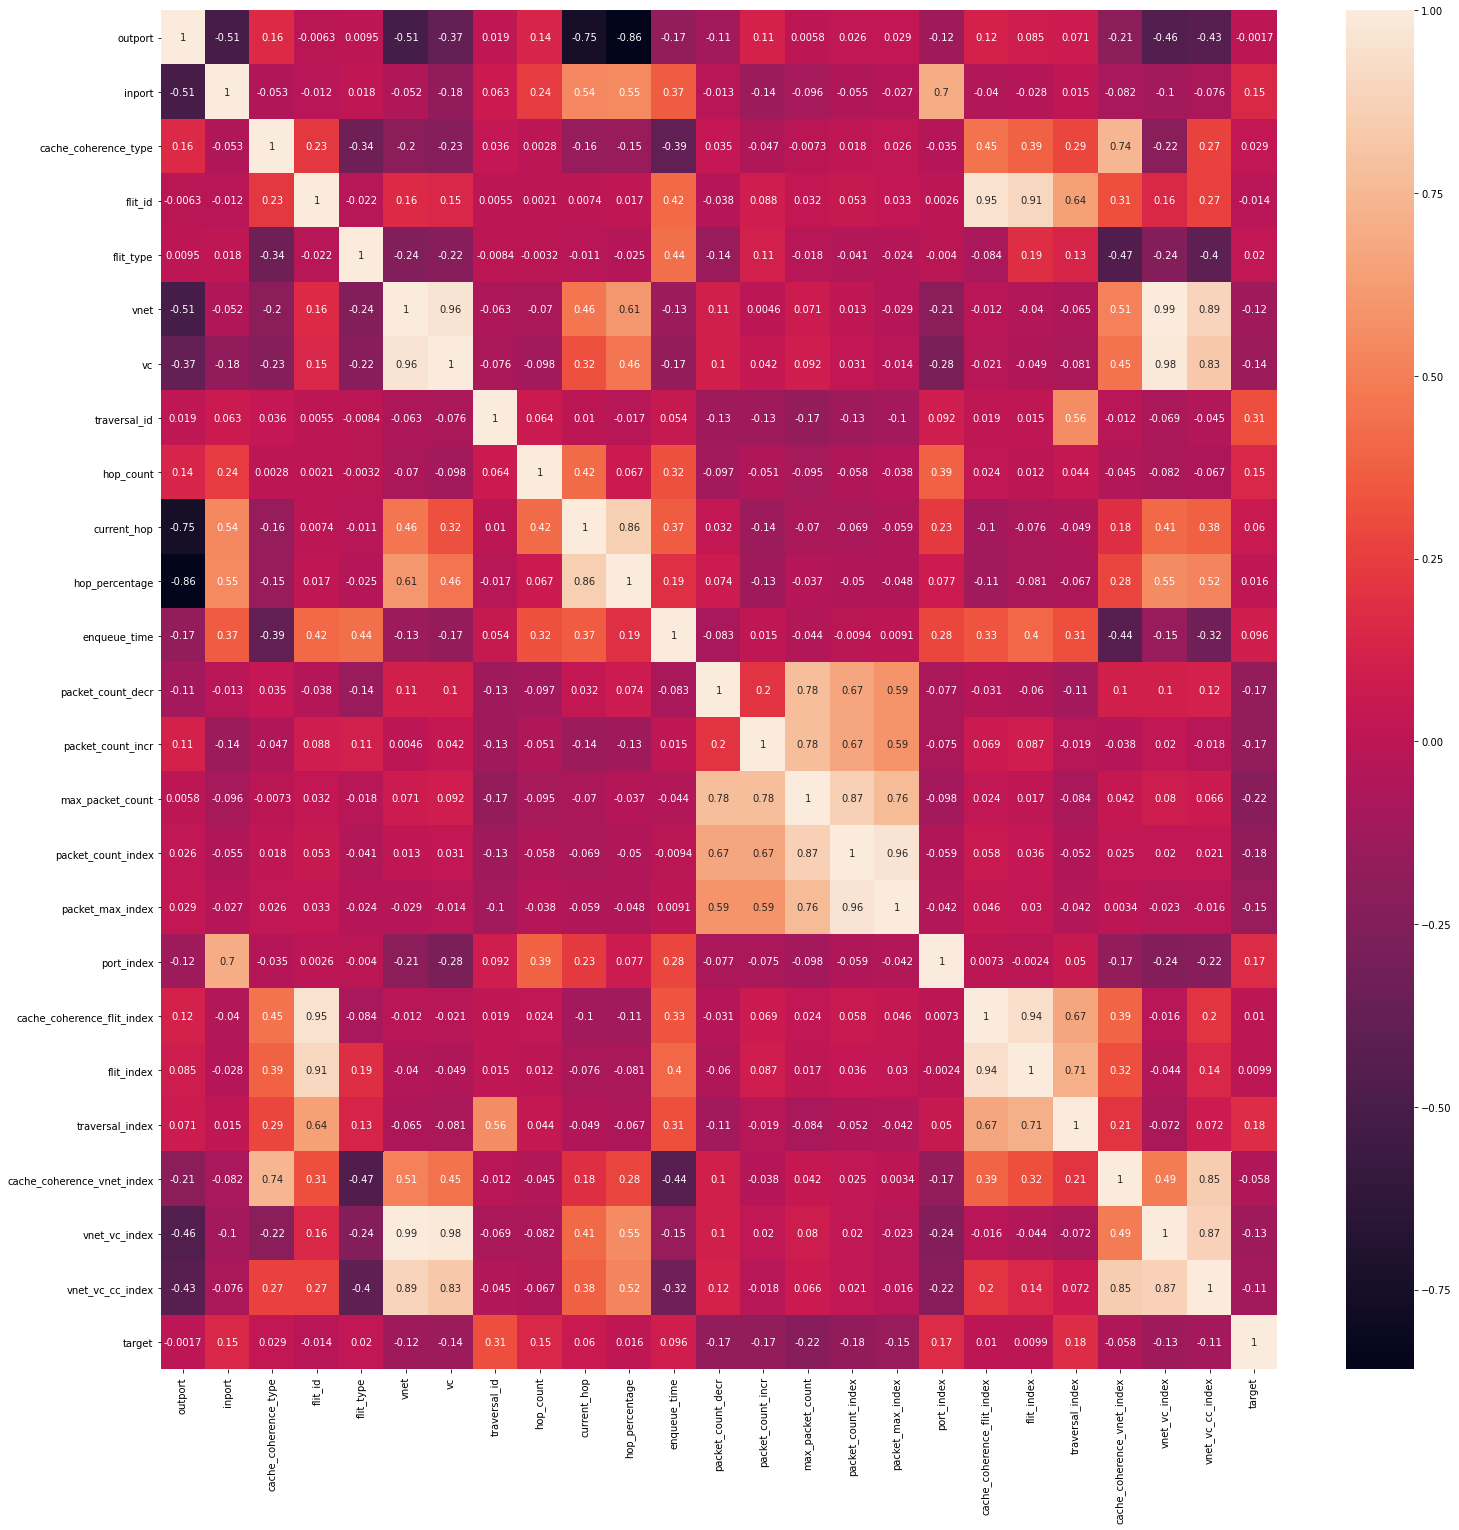

In [0]:
plt.figure(figsize=(25,25))
sns.heatmap(df.corr(), annot = True)
plt.show()

Processing Dataset for Training

In [0]:
train_X = df.drop(columns=['target'])
train_X

,outport,inport,cache_coherence_type,flit_id,flit_type,vnet,vc,traversal_id,hop_count,current_hop,hop_percentage,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,packet_max_index,port_index,cache_coherence_flit_index,flit_index,traversal_index,cache_coherence_vnet_index,vnet_vc_index,vnet_vc_cc_index
0,1,0,1,1,4,3,9,2,1,0,0.00,4,8,1,8,8,64,0,1,4,8,3,27,9
1,1,0,1,1,4,3,9,2,1,0,0.00,4,8,1,8,8,64,0,1,4,8,3,27,9
2,1,0,1,1,4,3,9,2,1,0,0.00,4,8,1,8,8,64,0,1,4,8,3,27,9
3,1,0,1,1,4,3,9,2,1,0,0.00,4,8,1,8,8,64,0,1,4,8,3,27,9
4,1,0,1,1,4,3,9,3,1,0,0.00,4,9,1,9,9,81,0,1,4,12,3,27,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297282,4,0,2,1,4,3,11,20040,4,0,0.00,32,1,1,1,1,1,0,2,8,160320,6,33,18
297283,1,0,7,1,4,3,12,20039,3,0,0.00,5,1,1,1,1,1,0,7,28,561092,21,36,63
297284,0,1,3,1,4,3,9,20040,4,4,1.00,24,1,1,1,1,1,0,3,12,240480,9,27,27
297285,1,4,7,1,4,3,9,20055,5,2,0.40,14,1,1,1,1,1,4,7,28,561540,21,27,63


In [0]:
#standardization
x = train_X.values
min_max_scaler = preprocessing.MinMaxScaler()
columns = train_X.columns
x_scaled = min_max_scaler.fit_transform(x)
train_X = pd.DataFrame(x_scaled)
train_X.columns = columns
train_X

,outport,inport,cache_coherence_type,flit_id,flit_type,vnet,vc,traversal_id,hop_count,current_hop,hop_percentage,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,packet_max_index,port_index,cache_coherence_flit_index,flit_index,traversal_index,cache_coherence_vnet_index,vnet_vc_index,vnet_vc_cc_index
0,0.25,0.00,0.000000,0.0,1.0,0.0,0.000,0.000050,0.166667,0.000000,0.00,0.000000,0.225806,0.0,0.225806,0.02583,0.007239,0.0,0.000000,0.000000,0.000002,0.000000,0.000000,0.000000
1,0.25,0.00,0.000000,0.0,1.0,0.0,0.000,0.000050,0.166667,0.000000,0.00,0.000000,0.225806,0.0,0.225806,0.02583,0.007239,0.0,0.000000,0.000000,0.000002,0.000000,0.000000,0.000000
2,0.25,0.00,0.000000,0.0,1.0,0.0,0.000,0.000050,0.166667,0.000000,0.00,0.000000,0.225806,0.0,0.225806,0.02583,0.007239,0.0,0.000000,0.000000,0.000002,0.000000,0.000000,0.000000
3,0.25,0.00,0.000000,0.0,1.0,0.0,0.000,0.000050,0.166667,0.000000,0.00,0.000000,0.225806,0.0,0.225806,0.02583,0.007239,0.0,0.000000,0.000000,0.000002,0.000000,0.000000,0.000000
4,0.25,0.00,0.000000,0.0,1.0,0.0,0.000,0.000100,0.166667,0.000000,0.00,0.000000,0.258065,0.0,0.258065,0.02952,0.009192,0.0,0.000000,0.000000,0.000004,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297282,1.00,0.00,0.166667,0.0,1.0,0.0,0.250,0.999103,0.666667,0.000000,0.00,0.500000,0.000000,0.0,0.000000,0.00000,0.000000,0.0,0.034483,0.046512,0.088891,0.166667,0.103448,0.098901
297283,0.25,0.00,1.000000,0.0,1.0,0.0,0.375,0.999053,0.500000,0.000000,0.00,0.017857,0.000000,0.0,0.000000,0.00000,0.000000,0.0,0.206897,0.279070,0.311110,1.000000,0.155172,0.593407
297284,0.00,0.25,0.333333,0.0,1.0,0.0,0.000,0.999103,0.666667,0.666667,1.00,0.357143,0.000000,0.0,0.000000,0.00000,0.000000,0.0,0.068966,0.093023,0.133338,0.333333,0.000000,0.197802
297285,0.25,1.00,1.000000,0.0,1.0,0.0,0.000,0.999850,0.833333,0.333333,0.40,0.178571,0.000000,0.0,0.000000,0.00000,0.000000,1.0,0.206897,0.279070,0.311358,1.000000,0.000000,0.593407


In [0]:
train_X[train_X.duplicated()].shape

(6621, 24)

In [0]:
test_X = df5.drop(columns=['target','timestamp','src_ni','src_router','dst_ni','dst_router'])
test_Y = df5['target']

In [0]:
#standardization
x = test_X.values
min_max_scaler = preprocessing.MinMaxScaler()
columns = test_X.columns
x_scaled = min_max_scaler.fit_transform(x)
test_X = pd.DataFrame(x_scaled)
test_X.columns = columns
test_X

,outport,inport,cache_coherence_type,flit_id,flit_type,vnet,vc,traversal_id,hop_count,current_hop,hop_percentage,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,packet_max_index,port_index,cache_coherence_flit_index,flit_index,traversal_index,cache_coherence_vnet_index,vnet_vc_index,vnet_vc_cc_index
0,0.25,0.00,0.000000,0.00,1.000000,0.0,0.000,0.000217,0.166667,0.000000,0.00,0.000000,0.275862,0.000000,0.275862,0.033473,0.011113,0.0,0.000000,0.000000,0.000010,0.000000,0.000000,0.000000
1,0.25,1.00,0.000000,0.00,1.000000,0.0,0.000,0.000109,0.333333,0.166667,0.50,0.072727,0.241379,0.034483,0.275862,0.062762,0.019864,1.0,0.000000,0.000000,0.000005,0.000000,0.000000,0.000000
2,0.25,1.00,0.000000,0.00,1.000000,0.0,0.000,0.000000,0.666667,0.500000,0.75,0.218182,0.206897,0.068966,0.275862,0.083682,0.026115,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.00,0.25,0.500000,0.00,0.000000,1.0,1.000,0.000217,0.166667,0.166667,1.00,0.072727,0.172414,0.103448,0.275862,0.096234,0.029865,0.0,0.103448,0.000000,0.000010,0.944444,1.000000,1.000000
4,0.00,0.25,0.500000,0.25,0.333333,1.0,1.000,0.000217,0.166667,0.166667,1.00,0.090909,0.137931,0.137931,0.275862,0.100418,0.031115,0.0,0.241379,0.139535,0.000053,0.944444,1.000000,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,0.00,0.00,0.666667,1.00,0.666667,0.0,0.000,0.999891,0.000000,0.000000,0.00,0.509091,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.827586,0.825581,0.833514,0.666667,0.000000,0.395604
29996,0.00,0.00,0.000000,0.00,1.000000,0.0,0.125,1.000000,0.000000,0.000000,0.00,0.509091,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.044454,0.000000,0.051724,0.000000
29997,1.00,0.00,0.833333,0.00,0.000000,0.0,0.250,0.999891,0.666667,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.172414,0.023256,0.066677,0.833333,0.103448,0.494505
29998,1.00,0.00,0.833333,0.25,0.333333,0.0,0.250,0.999891,0.666667,0.000000,0.00,0.127273,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.379310,0.232558,0.266721,0.833333,0.103448,0.494505


In [0]:
test_X[test_X.duplicated()].shape

(0, 24)

In [0]:
test_X1 = df6.drop(columns=['target','timestamp','src_ni','src_router','dst_ni','dst_router'])
test_Y1 = df6['target']
x = test_X1.values
min_max_scaler = preprocessing.MinMaxScaler()
columns = test_X1.columns
x_scaled = min_max_scaler.fit_transform(x)
test_X1 = pd.DataFrame(x_scaled)
test_X1.columns = columns
print(test_X1[test_X1.duplicated()].shape)
test_X1

(0, 24)


,outport,inport,cache_coherence_type,flit_id,flit_type,vnet,vc,traversal_id,hop_count,current_hop,hop_percentage,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,packet_max_index,port_index,cache_coherence_flit_index,flit_index,traversal_index,cache_coherence_vnet_index,vnet_vc_index,vnet_vc_cc_index
0,0.25,0.00,0.000000,0.00,1.000000,0.0,0.000,0.000102,0.166667,0.000000,0.00,0.000000,0.250000,0.000000,0.25,0.031250,0.009657,0.0,0.000000,0.000000,0.000005,0.000000,0.000000,0.000000
1,0.25,1.00,0.000000,0.00,1.000000,0.0,0.000,0.000000,0.666667,0.500000,0.75,0.214286,0.214286,0.035714,0.25,0.058036,0.017014,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.00,0.25,0.500000,0.00,0.000000,1.0,1.000,0.000102,0.166667,0.166667,1.00,0.071429,0.178571,0.071429,0.25,0.075893,0.021919,0.0,0.103448,0.000000,0.000005,0.944444,1.000000,1.000000
3,0.00,0.25,0.500000,0.25,0.333333,1.0,1.000,0.000102,0.166667,0.166667,1.00,0.089286,0.142857,0.107143,0.25,0.084821,0.024372,0.0,0.241379,0.139535,0.000032,0.944444,1.000000,1.000000
4,0.00,0.25,0.500000,0.50,0.333333,1.0,1.000,0.000102,0.166667,0.166667,1.00,0.107143,0.107143,0.142857,0.25,0.084821,0.024372,0.0,0.379310,0.232558,0.000050,0.944444,1.000000,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,0.00,0.25,0.000000,0.00,1.000000,0.0,0.125,1.000000,0.500000,0.500000,1.00,0.714286,0.000000,0.000000,0.00,0.000000,0.000000,0.0,0.000000,0.000000,0.044463,0.000000,0.051724,0.000000
29996,1.00,0.00,0.666667,0.50,0.333333,0.0,0.000,0.999898,0.333333,0.000000,0.00,0.250000,0.000000,0.000000,0.00,0.000000,0.000000,0.0,0.482759,0.302326,0.333466,0.666667,0.000000,0.395604
29997,1.00,0.00,0.833333,0.00,0.000000,0.0,0.000,0.999796,0.666667,0.000000,0.00,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.0,0.172414,0.023256,0.066683,0.833333,0.000000,0.494505
29998,1.00,0.00,0.666667,0.75,0.333333,0.0,0.000,0.999898,0.333333,0.000000,0.00,0.375000,0.000000,0.000000,0.00,0.000000,0.000000,0.0,0.655172,0.418605,0.444623,0.666667,0.000000,0.395604


In [0]:
test_X2 = df7.drop(columns=['target','timestamp','src_ni','src_router','dst_ni','dst_router'])
test_Y2 = df7['target']
x = test_X2.values
min_max_scaler = preprocessing.MinMaxScaler()
columns = test_X2.columns
x_scaled = min_max_scaler.fit_transform(x)
test_X2 = pd.DataFrame(x_scaled)
test_X2.columns = columns
print(test_X2[test_X2.duplicated()].shape)
test_X2

(0, 24)


,outport,inport,cache_coherence_type,flit_id,flit_type,vnet,vc,traversal_id,hop_count,current_hop,hop_percentage,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,packet_max_index,port_index,cache_coherence_flit_index,flit_index,traversal_index,cache_coherence_vnet_index,vnet_vc_index,vnet_vc_cc_index
0,0.25,0.00,0.000000,0.00,1.000000,0.0,0.000,0.000102,0.166667,0.000000,0.00,0.000000,0.250000,0.000000,0.25,0.031250,0.009657,0.0,0.000000,0.000000,0.000005,0.000000,0.000000,0.000000
1,0.25,1.00,0.000000,0.00,1.000000,0.0,0.000,0.000000,0.666667,0.500000,0.75,0.244898,0.214286,0.035714,0.25,0.058036,0.017014,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.00,0.25,0.500000,0.00,0.000000,1.0,1.000,0.000102,0.166667,0.166667,1.00,0.081633,0.178571,0.071429,0.25,0.075893,0.021919,0.0,0.103448,0.000000,0.000005,0.944444,1.000000,1.000000
3,0.00,0.25,0.500000,0.25,0.333333,1.0,1.000,0.000102,0.166667,0.166667,1.00,0.102041,0.142857,0.107143,0.25,0.084821,0.024372,0.0,0.241379,0.139535,0.000032,0.944444,1.000000,1.000000
4,0.00,0.25,0.500000,0.50,0.333333,1.0,1.000,0.000102,0.166667,0.166667,1.00,0.122449,0.107143,0.142857,0.25,0.084821,0.024372,0.0,0.379310,0.232558,0.000050,0.944444,1.000000,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,0.00,0.25,0.666667,0.25,0.333333,0.0,0.000,0.999898,0.500000,0.500000,1.00,0.387755,0.000000,0.000000,0.00,0.000000,0.000000,0.0,0.310345,0.186047,0.222446,0.666667,0.000000,0.395604
29996,0.00,0.25,0.666667,0.50,0.333333,0.0,0.000,0.999898,0.500000,0.500000,1.00,0.530612,0.000000,0.000000,0.00,0.000000,0.000000,0.0,0.482759,0.302326,0.333671,0.666667,0.000000,0.395604
29997,0.00,0.25,0.666667,0.75,0.333333,0.0,0.000,0.999898,0.500000,0.500000,1.00,0.673469,0.000000,0.000000,0.00,0.000000,0.000000,0.0,0.655172,0.418605,0.444896,0.666667,0.000000,0.395604
29998,0.00,0.25,0.666667,1.00,0.666667,0.0,0.000,0.999898,0.500000,0.500000,1.00,0.816327,0.000000,0.000000,0.00,0.000000,0.000000,0.0,0.827586,0.825581,0.834184,0.666667,0.000000,0.395604


In [0]:
test_X3 = df8.drop(columns=['target','timestamp','src_ni','src_router','dst_ni','dst_router'])
test_Y3 = df8['target']
x = test_X3.values
min_max_scaler = preprocessing.MinMaxScaler()
columns = test_X3.columns
x_scaled = min_max_scaler.fit_transform(x)
test_X3 = pd.DataFrame(x_scaled)
test_X3.columns = columns
print(test_X3[test_X3.duplicated()].shape)
test_X3

(0, 24)


,outport,inport,cache_coherence_type,flit_id,flit_type,vnet,vc,traversal_id,hop_count,current_hop,hop_percentage,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,packet_max_index,port_index,cache_coherence_flit_index,flit_index,traversal_index,cache_coherence_vnet_index,vnet_vc_index,vnet_vc_cc_index
0,0.25,0.00,0.000000,0.00,1.000000,0.0,0.000,0.000102,0.166667,0.000000,0.00,0.000000,0.250000,0.000000,0.25,0.031250,0.009657,0.0,0.000000,0.000000,0.000005,0.000000,0.000000,0.000000
1,0.25,1.00,0.000000,0.00,1.000000,0.0,0.000,0.000000,0.666667,0.500000,0.75,0.222222,0.214286,0.035714,0.25,0.058036,0.017014,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.00,0.25,0.500000,0.00,0.000000,1.0,1.000,0.000102,0.166667,0.166667,1.00,0.074074,0.178571,0.071429,0.25,0.075893,0.021919,0.0,0.103448,0.000000,0.000005,0.944444,1.000000,1.000000
3,0.00,0.25,0.500000,0.25,0.333333,1.0,1.000,0.000102,0.166667,0.166667,1.00,0.092593,0.142857,0.107143,0.25,0.084821,0.024372,0.0,0.241379,0.139535,0.000032,0.944444,1.000000,1.000000
4,0.00,0.25,0.500000,0.50,0.333333,1.0,1.000,0.000102,0.166667,0.166667,1.00,0.111111,0.107143,0.142857,0.25,0.084821,0.024372,0.0,0.379310,0.232558,0.000050,0.944444,1.000000,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,1.00,0.00,0.833333,0.50,0.333333,0.0,0.125,0.999898,0.666667,0.000000,0.00,0.259259,0.000000,0.000000,0.00,0.000000,0.000000,0.0,0.586207,0.372093,0.399997,0.833333,0.051724,0.494505
29996,1.00,0.00,0.833333,0.75,0.333333,0.0,0.125,0.999898,0.666667,0.000000,0.00,0.388889,0.000000,0.000000,0.00,0.000000,0.000000,0.0,0.793103,0.511628,0.533331,0.833333,0.051724,0.494505
29997,1.00,0.00,0.833333,1.00,0.666667,0.0,0.125,0.999898,0.666667,0.000000,0.00,0.518519,0.000000,0.000000,0.00,0.000000,0.000000,0.0,1.000000,1.000000,1.000000,0.833333,0.051724,0.494505
29998,1.00,0.00,0.166667,0.00,1.000000,0.0,0.250,1.000000,0.666667,0.000000,0.00,0.518519,0.000000,0.000000,0.00,0.000000,0.000000,0.0,0.034483,0.046512,0.088894,0.166667,0.103448,0.098901


In [0]:
test_X4 = df9.drop(columns=['target','timestamp','src_ni','src_router','dst_ni','dst_router'])
test_Y4 = df9['target']
x = test_X4.values
min_max_scaler = preprocessing.MinMaxScaler()
columns = test_X4.columns
x_scaled = min_max_scaler.fit_transform(x)
test_X4 = pd.DataFrame(x_scaled)
test_X4.columns = columns
print(test_X4[test_X4.duplicated()].shape)
test_X4

(0, 24)


,outport,inport,cache_coherence_type,flit_id,flit_type,vnet,vc,traversal_id,hop_count,current_hop,hop_percentage,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,packet_max_index,port_index,cache_coherence_flit_index,flit_index,traversal_index,cache_coherence_vnet_index,vnet_vc_index,vnet_vc_cc_index
0,0.25,0.00,0.000000,0.00,1.000000,0.0,0.0,0.000102,0.166667,0.000000,0.00,0.000000,0.21875,0.00000,0.21875,0.024306,0.006607,0.0,0.000000,0.000000,0.000005,0.000000,0.0,0.000000
1,0.25,1.00,0.000000,0.00,1.000000,0.0,0.0,0.000000,0.666667,0.500000,0.75,0.214286,0.18750,0.03125,0.21875,0.045139,0.011640,1.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
2,0.00,0.25,0.500000,0.00,0.000000,1.0,1.0,0.000102,0.166667,0.166667,1.00,0.071429,0.15625,0.06250,0.21875,0.059028,0.014996,0.0,0.103448,0.000000,0.000005,0.944444,1.0,1.000000
3,0.00,0.25,0.500000,0.25,0.333333,1.0,1.0,0.000102,0.166667,0.166667,1.00,0.089286,0.12500,0.09375,0.21875,0.065972,0.016674,0.0,0.241379,0.139535,0.000032,0.944444,1.0,1.000000
4,0.00,0.25,0.500000,0.50,0.333333,1.0,1.0,0.000102,0.166667,0.166667,1.00,0.107143,0.09375,0.12500,0.21875,0.065972,0.016674,0.0,0.379310,0.232558,0.000050,0.944444,1.0,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,0.00,0.25,0.666667,0.50,0.333333,0.0,0.0,0.999898,0.833333,0.833333,1.00,0.607143,0.00000,0.00000,0.00000,0.000000,0.000000,0.0,0.482759,0.302326,0.333398,0.666667,0.0,0.395604
29996,0.00,1.00,0.666667,0.25,0.333333,0.0,0.0,1.000000,0.500000,0.500000,1.00,0.339286,0.00000,0.00000,0.00000,0.000000,0.000000,0.0,0.310345,0.186047,0.222287,0.666667,0.0,0.395604
29997,0.00,0.25,0.666667,0.75,0.333333,0.0,0.0,0.999898,0.833333,0.833333,1.00,0.732143,0.00000,0.00000,0.00000,0.000000,0.000000,0.0,0.655172,0.418605,0.444533,0.666667,0.0,0.395604
29998,0.00,1.00,0.666667,0.50,0.333333,0.0,0.0,1.000000,0.500000,0.500000,1.00,0.464286,0.00000,0.00000,0.00000,0.000000,0.000000,0.0,0.482759,0.302326,0.333432,0.666667,0.0,0.395604


In [0]:
test_X5 = df10.drop(columns=['target','timestamp','src_ni','src_router','dst_ni','dst_router'])
test_Y5 = df10['target']
x = test_X5.values
min_max_scaler = preprocessing.MinMaxScaler()
columns = test_X5.columns
x_scaled = min_max_scaler.fit_transform(x)
test_X5 = pd.DataFrame(x_scaled)
test_X5.columns = columns
print(test_X5[test_X5.duplicated()].shape)
test_X5

(0, 24)


,outport,inport,cache_coherence_type,flit_id,flit_type,vnet,vc,traversal_id,hop_count,current_hop,hop_percentage,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,packet_max_index,port_index,cache_coherence_flit_index,flit_index,traversal_index,cache_coherence_vnet_index,vnet_vc_index,vnet_vc_cc_index
0,0.25,0.00,0.000000,0.00,1.000000,0.0,0.0,0.000104,0.166667,0.000000,0.00,0.000000,0.205882,0.000000,0.205882,0.021672,0.005556,0.0,0.000000,0.000000,0.000005,0.000000,0.0,0.000000
1,0.25,1.00,0.000000,0.00,1.000000,0.0,0.0,0.000000,0.666667,0.500000,0.75,0.214286,0.176471,0.029412,0.205882,0.040248,0.009789,1.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
2,0.00,0.25,0.500000,0.00,0.000000,1.0,1.0,0.000104,0.166667,0.166667,1.00,0.071429,0.147059,0.058824,0.205882,0.052632,0.012611,0.0,0.103448,0.000000,0.000005,0.944444,1.0,1.000000
3,0.00,0.25,0.500000,0.25,0.333333,1.0,1.0,0.000104,0.166667,0.166667,1.00,0.089286,0.117647,0.088235,0.205882,0.058824,0.014022,0.0,0.241379,0.139535,0.000032,0.944444,1.0,1.000000
4,0.00,0.25,0.500000,0.50,0.333333,1.0,1.0,0.000104,0.166667,0.166667,1.00,0.107143,0.088235,0.117647,0.205882,0.058824,0.014022,0.0,0.379310,0.232558,0.000051,0.944444,1.0,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,0.00,0.25,0.333333,0.00,1.000000,0.0,0.0,0.999896,0.666667,0.666667,1.00,0.357143,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.068966,0.093023,0.133343,0.333333,0.0,0.197802
29996,0.00,0.00,0.666667,0.00,0.000000,0.0,0.0,1.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.137931,0.011628,0.055563,0.666667,0.0,0.395604
29997,0.00,0.00,0.666667,0.25,0.333333,0.0,0.0,1.000000,0.000000,0.000000,0.00,0.125000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.310345,0.186047,0.222265,0.666667,0.0,0.395604
29998,0.00,0.00,0.666667,0.50,0.333333,0.0,0.0,1.000000,0.000000,0.000000,0.00,0.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.482759,0.302326,0.333400,0.666667,0.0,0.395604


In [0]:
test_X6 = df14.drop(columns=['target','timestamp','src_ni','src_router','dst_ni','dst_router'])
test_Y6 = df14['target']
x = test_X6.values
min_max_scaler = preprocessing.MinMaxScaler()
columns = test_X6.columns
x_scaled = min_max_scaler.fit_transform(x)
test_X6 = pd.DataFrame(x_scaled)
test_X6.columns = columns
print(test_X6[test_X6.duplicated()].shape)
test_X6

(30, 24)


,outport,inport,cache_coherence_type,flit_id,flit_type,vnet,vc,traversal_id,hop_count,current_hop,hop_percentage,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,packet_max_index,port_index,cache_coherence_flit_index,flit_index,traversal_index,cache_coherence_vnet_index,vnet_vc_index,vnet_vc_cc_index
0,0.25,1.00,0.000000,0.00,1.000000,0.0,0.000000,0.000000,0.333333,0.75,0.75,0.214286,0.0,0.0,0.0,0.0,0.0,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.25,1.00,0.000000,0.00,1.000000,0.0,0.000000,0.000349,0.333333,0.75,0.75,0.214286,0.0,0.0,0.0,0.0,0.0,1.0,0.000000,0.000000,0.000016,0.000000,0.000000,0.000000
2,0.25,1.00,0.000000,0.00,1.000000,0.0,0.000000,0.000648,0.333333,0.75,0.75,0.214286,0.0,0.0,0.0,0.0,0.0,1.0,0.000000,0.000000,0.000029,0.000000,0.000000,0.000000
3,0.25,1.00,0.000000,0.00,1.000000,0.0,0.000000,0.000947,0.666667,0.75,0.60,0.214286,0.0,0.0,0.0,0.0,0.0,1.0,0.000000,0.000000,0.000042,0.000000,0.000000,0.000000
4,0.00,0.25,0.000000,0.00,1.000000,0.0,0.000000,0.001944,0.000000,0.75,1.00,0.214286,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000087,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19455,0.25,1.00,0.666667,0.25,0.333333,0.0,0.000000,0.999950,0.666667,0.75,0.60,0.339286,0.0,0.0,0.0,0.0,0.0,1.0,0.310345,0.186047,0.222464,0.666667,0.000000,0.666667
19456,0.25,1.00,0.666667,0.50,0.333333,0.0,0.000000,0.999950,0.666667,0.75,0.60,0.464286,0.0,0.0,0.0,0.0,0.0,1.0,0.482759,0.302326,0.333698,0.666667,0.000000,0.666667
19457,0.25,1.00,0.666667,0.75,0.333333,0.0,0.000000,0.999950,0.666667,0.75,0.60,0.589286,0.0,0.0,0.0,0.0,0.0,1.0,0.655172,0.418605,0.444931,0.666667,0.000000,0.666667
19458,0.25,1.00,0.666667,1.00,0.666667,0.0,0.000000,0.999950,0.666667,0.75,0.60,0.714286,0.0,0.0,0.0,0.0,0.0,1.0,0.827586,0.825581,0.834248,0.666667,0.000000,0.666667


#### Machine Learning Models

Module Imports for Data Processing and Report Generation in Machine Learning Models

In [0]:
from sklearn.model_selection import train_test_split

import statsmodels.api as sm
from sklearn import metrics

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score

Labels

1.   0 -  malicious
2.   1 -  good



In [0]:
train_Y = df['target']
train_Y.value_counts()

0    160000
1    137287
Name: target, dtype: int64

Training and Validation Splitting of the Dataset

In [0]:
seed = 5
np.random.seed(seed)

In [0]:
X_train, X_test, y_train, y_test = train_test_split(train_X, train_Y, test_size=0.2, random_state=seed, shuffle=True)

Feature Selection

                         Specs        Score
17                  port_index  6043.751871
7                 traversal_id  3528.980694
1                       inport  2688.009157
5                         vnet  2608.528369
14            max_packet_count  2479.866546
22               vnet_vc_index  2423.739375
6                           vc  2231.813367
12           packet_count_decr  1243.452138
13           packet_count_incr  1236.424906
20             traversal_index  1192.800065
15          packet_count_index  1047.237191
16            packet_max_index   688.119207
8                    hop_count   548.076465
23            vnet_vc_cc_index   484.437868
9                  current_hop   273.418578
11                enqueue_time   261.835939
21  cache_coherence_vnet_index    90.535471


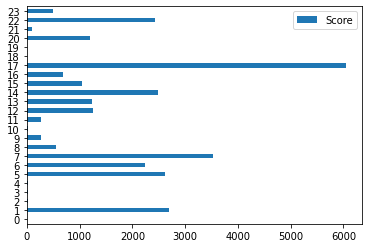

In [0]:
#SelectKBest for feature selection
bf = SelectKBest(score_func=chi2, k=17)
fit = bf.fit(X_train,y_train)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(columns)

featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score'] 
print(featureScores.nlargest(17,'Score'))
featureScores.plot(kind='barh')

Logistic Regression

In [0]:
#logistic regression
from sklearn.linear_model import LogisticRegression

In [0]:
logit_model=sm.Logit(train_Y,train_X)
#result=logit_model.fit()
#print(result.summary2())

In [0]:
logreg = LogisticRegression(C=5,penalty='l2',random_state=42, max_iter=500)
logreg.fit(X_train, y_train)

LogisticRegression(C=5, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=500,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [0]:
y_pred = logreg.predict(X_test)
logreg_score_train = logreg.score(X_train,y_train)
print("Train Prediction Score",logreg_score_train*100)
logreg_score_test = accuracy_score(y_test,y_pred)
print("Test Prediction ",logreg_score_test*100)

Train Prediction Score 65.91879039141568
Test Prediction  66.38635675602946


In [0]:
y_pred_test = logreg.predict(test_X)
logreg_score_test = accuracy_score(test_Y,y_pred_test)
print("Test Prediction ",logreg_score_test*100)

Test Prediction  51.73


In [0]:
y_pred_test = logreg.predict(test_X1)
logreg_score_test = accuracy_score(test_Y1,y_pred_test)
print("Test Prediction ",logreg_score_test*100)

Test Prediction  50.903333333333336


In [0]:
y_pred_test = logreg.predict(test_X2)
logreg_score_test = accuracy_score(test_Y2,y_pred_test)
print("Test Prediction ",logreg_score_test*100)

Test Prediction  51.22


In [0]:
y_pred_test = logreg.predict(test_X3)
logreg_score_test = accuracy_score(test_Y3,y_pred_test)
print("Test Prediction ",logreg_score_test*100)

Test Prediction  51.626666666666665


In [0]:
y_pred_test = logreg.predict(test_X4)
logreg_score_test = accuracy_score(test_Y4,y_pred_test)
print("Test Prediction ",logreg_score_test*100)

Test Prediction  50.31333333333333


In [0]:
y_pred_test = logreg.predict(test_X5)
logreg_score_test = accuracy_score(test_Y5,y_pred_test)
print("Test Prediction ",logreg_score_test*100)

Test Prediction  48.843333333333334


In [0]:
y_pred_test = logreg.predict(test_X6)
logreg_score_test = accuracy_score(test_Y6,y_pred_test)
print("Test Prediction ",logreg_score_test*100)

Test Prediction  48.992805755395686


In [0]:
feature_importance=pd.DataFrame(np.hstack((np.array([columns[::]]).T, logreg.coef_.T)), columns=['feature', 'importance'])
feature_importance['importance']=pd.to_numeric(feature_importance['importance'])
feature_importance.sort_values(by='importance', ascending=False)

,feature,importance
15,packet_count_index,3.525775
18,cache_coherence_flit_index,3.098081
7,traversal_id,2.532436
8,hop_count,1.161070
10,hop_percentage,0.586702
17,port_index,0.483545
6,vc,0.293188
1,inport,0.101325
4,flit_type,0.098699
20,traversal_index,-0.079570


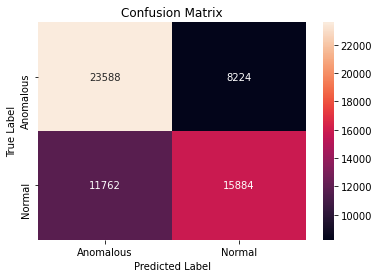

In [0]:
cm = confusion_matrix(y_test, y_pred)
class_label = ["Anomalous", "Normal"]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [0]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.67      0.74      0.70     31812
           1       0.66      0.57      0.61     27646

    accuracy                           0.66     59458
   macro avg       0.66      0.66      0.66     59458
weighted avg       0.66      0.66      0.66     59458



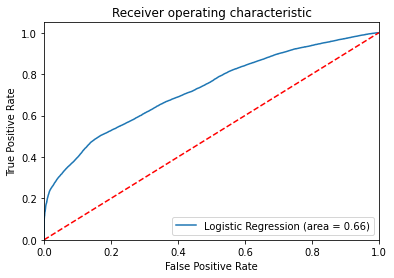

In [0]:
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('LOG_ROC')
plt.show()

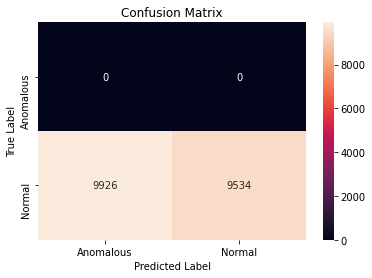

In [0]:
cm = confusion_matrix(test_Y6, y_pred_test)
class_label = ["Anomalous", "Normal"]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [0]:
print(classification_report(test_Y6, y_pred_test))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.49      0.66     19460

    accuracy                           0.49     19460
   macro avg       0.50      0.24      0.33     19460
weighted avg       1.00      0.49      0.66     19460



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


KNeighbors Classifier

In [0]:
#KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [0]:
y_pred_knn= knn.predict(X_test)

In [0]:
knn_score_train = knn.score(X_train,y_train)
print("Train Prediction Score",knn_score_train*100)
knn_score_test = accuracy_score(y_test,y_pred_knn)
print("Test Prediction ",knn_score_test*100)

Train Prediction Score 87.84546880321575
Test Prediction  82.2126543106058


In [0]:
y_pred_knn_test= knn.predict(test_X)
knn_score_test = accuracy_score(test_Y,y_pred_knn_test)
print("Test Prediction ",knn_score_test*100)

Test Prediction  57.440000000000005


In [0]:
y_pred_knn_test= knn.predict(test_X1)
knn_score_test = accuracy_score(test_Y1,y_pred_knn_test)
print("Test Prediction ",knn_score_test*100)

Test Prediction  54.81333333333333


In [0]:
y_pred_knn_test= knn.predict(test_X2)
knn_score_test = accuracy_score(test_Y2,y_pred_knn_test)
print("Test Prediction ",knn_score_test*100)

Test Prediction  54.72


In [0]:
y_pred_knn_test= knn.predict(test_X3)
knn_score_test = accuracy_score(test_Y3,y_pred_knn_test)
print("Test Prediction ",knn_score_test*100)

Test Prediction  53.480000000000004


In [0]:
y_pred_knn_test= knn.predict(test_X4)
knn_score_test = accuracy_score(test_Y4,y_pred_knn_test)
print("Test Prediction ",knn_score_test*100)

Test Prediction  54.70333333333334


In [0]:
y_pred_knn_test= knn.predict(test_X5)
knn_score_test = accuracy_score(test_Y5,y_pred_knn_test)
print("Test Prediction ",knn_score_test*100)

Test Prediction  51.77


In [0]:
y_pred_knn_test= knn.predict(test_X6)
knn_score_test = accuracy_score(test_Y6,y_pred_knn_test)
print("Test Prediction ",knn_score_test*100)

Test Prediction  63.201438848920866


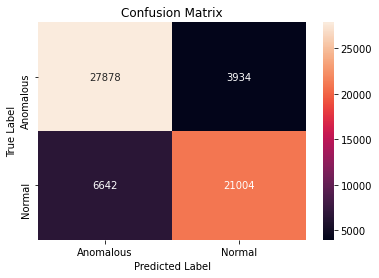

In [0]:
cm = confusion_matrix(y_test, y_pred_knn)
class_label = ["Anomalous", "Normal"]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [0]:
print(classification_report(y_test,y_pred_knn))

              precision    recall  f1-score   support

           0       0.81      0.88      0.84     31812
           1       0.84      0.76      0.80     27646

    accuracy                           0.82     59458
   macro avg       0.82      0.82      0.82     59458
weighted avg       0.82      0.82      0.82     59458



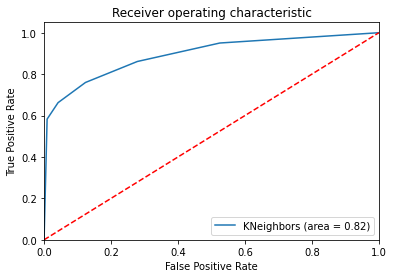

In [0]:
knn_roc_auc = roc_auc_score(y_test, y_pred_knn)
fpr, tpr, thresholds = roc_curve(y_test, knn.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='KNeighbors (area = %0.2f)' % knn_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('KNN_ROC')
plt.show()

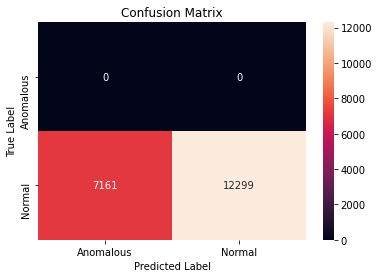

In [0]:
cm = confusion_matrix(test_Y6, y_pred_knn_test)
class_label = ["Anomalous", "Normal"]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [0]:
print(classification_report(test_Y6,y_pred_knn_test))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.63      0.77     19460

    accuracy                           0.63     19460
   macro avg       0.50      0.32      0.39     19460
weighted avg       1.00      0.63      0.77     19460



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Naive Bayes Classifier

In [0]:
#naive_bayes
from sklearn.naive_bayes import GaussianNB

In [0]:
nb = GaussianNB()
nb.fit(X_train,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [0]:
y_pred_nb= nb.predict(X_test)

In [0]:
nb_score_train = nb.score(X_train,y_train)
print("Train Prediction Score",nb_score_train*100)
nb_score_test = accuracy_score(y_test,y_pred_nb)
print("Test Prediction Score",nb_score_test*100)

Train Prediction Score 63.732345508747876
Test Prediction Score 64.17639342056577


In [0]:
y_pred_nb_test= nb.predict(test_X)
nb_score_test = accuracy_score(test_Y,y_pred_nb_test)
print("Test Prediction Score",nb_score_test*100)

Test Prediction Score 49.28666666666667


In [0]:
y_pred_nb_test= nb.predict(test_X1)
nb_score_test = accuracy_score(test_Y1,y_pred_nb_test)
print("Test Prediction ",nb_score_test*100)

Test Prediction  48.19


In [0]:
y_pred_nb_test= nb.predict(test_X2)
nb_score_test = accuracy_score(test_Y2,y_pred_nb_test)
print("Test Prediction ",nb_score_test*100)

Test Prediction  47.93


In [0]:
y_pred_nb_test= nb.predict(test_X3)
nb_score_test = accuracy_score(test_Y3,y_pred_nb_test)
print("Test Prediction ",nb_score_test*100)

Test Prediction  49.04333333333334


In [0]:
y_pred_nb_test= nb.predict(test_X4)
nb_score_test = accuracy_score(test_Y4,y_pred_nb_test)
print("Test Prediction ",nb_score_test*100)

Test Prediction  46.45


In [0]:
y_pred_nb_test= nb.predict(test_X5)
nb_score_test = accuracy_score(test_Y5,y_pred_nb_test)
print("Test Prediction ",nb_score_test*100)

Test Prediction  44.46333333333333


In [0]:
y_pred_nb_test= nb.predict(test_X6)
nb_score_test = accuracy_score(test_Y6,y_pred_nb_test)
print("Test Prediction ",nb_score_test*100)

Test Prediction  84.09558067831449


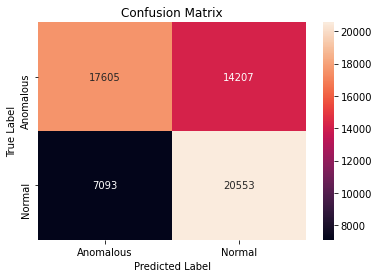

In [0]:
cm = confusion_matrix(y_test, y_pred_nb)
class_label = ["Anomalous", "Normal"]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [0]:
print(classification_report(y_test,y_pred_nb))

              precision    recall  f1-score   support

           0       0.71      0.55      0.62     31812
           1       0.59      0.74      0.66     27646

    accuracy                           0.64     59458
   macro avg       0.65      0.65      0.64     59458
weighted avg       0.66      0.64      0.64     59458



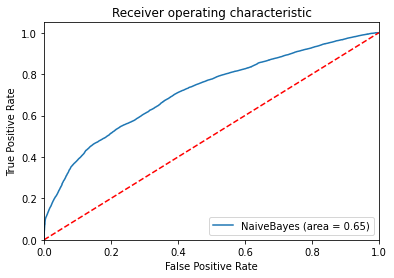

In [0]:
nb_roc_auc = roc_auc_score(y_test, y_pred_nb)
fpr, tpr, thresholds = roc_curve(y_test, nb.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='NaiveBayes (area = %0.2f)' % nb_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('NB_ROC')
plt.show()

### Neural Networks

In [0]:
#neuralnetwork
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping
from keras.layers import BatchNormalization, Dropout
from keras.optimizers import SGD
from keras.layers import PReLU

Using TensorFlow backend.


2-Layer Neural Network

In [0]:
#2layer
model = Sequential()
n_cols = X_train.shape[1]
model.add(Dense(2, activation='relu', input_shape=(n_cols,)))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])
early_stopping_monitor = EarlyStopping(patience=20)
history = model.fit(X_train, y_train, epochs=10, validation_split=0.2 )

Train on 190263 samples, validate on 47566 samples
Epoch 1/10
190263/190263 [==============================] - 7s 39us/step - loss: 0.2132 - accuracy: 0.6510 - val_loss: 0.2046 - val_accuracy: 0.6649
Epoch 2/10
190263/190263 [==============================] - 7s 37us/step - loss: 0.1923 - accuracy: 0.7063 - val_loss: 0.1845 - val_accuracy: 0.7386
Epoch 3/10
190263/190263 [==============================] - 7s 38us/step - loss: 0.1806 - accuracy: 0.7453 - val_loss: 0.1782 - val_accuracy: 0.7466
Epoch 4/10
190263/190263 [==============================] - 7s 37us/step - loss: 0.1770 - accuracy: 0.7470 - val_loss: 0.1760 - val_accuracy: 0.7458
Epoch 5/10
190263/190263 [==============================] - 7s 37us/step - loss: 0.1757 - accuracy: 0.7474 - val_loss: 0.1764 - val_accuracy: 0.7381
Epoch 6/10
190263/190263 [==============================] - 7s 38us/step - loss: 0.1751 - accuracy: 0.7475 - val_loss: 0.1750 - val_accuracy: 0.7468
Epoch 7/10
190263/190263 [=============================

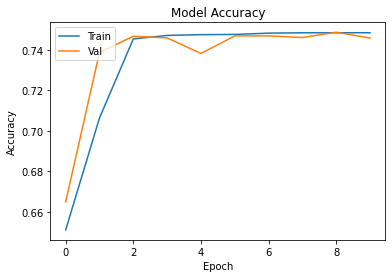

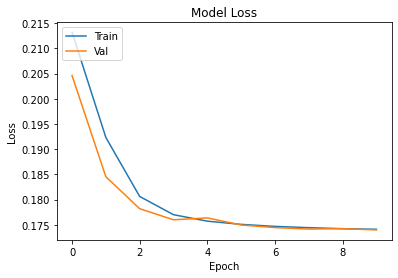

In [0]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

In [0]:
scores = model.evaluate(X_test, y_test, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 74.89%


In [0]:
scores = model.evaluate(test_X, test_Y, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 57.20%


In [0]:
scores = model.evaluate(test_X1, test_Y1, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 59.84%


In [0]:
scores = model.evaluate(test_X2, test_Y2, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 60.07%


In [0]:
scores = model.evaluate(test_X3, test_Y3, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 60.78%


In [0]:
scores = model.evaluate(test_X4, test_Y4, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 59.45%


In [0]:
scores = model.evaluate(test_X5, test_Y5, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 57.13%


In [0]:
scores = model.evaluate(test_X6, test_Y6, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 64.68%


3-Layer Neural Network

In [0]:
#3layer
model = Sequential()
n_cols = X_train.shape[1]
model.add(Dense(4, activation="relu", input_shape=(n_cols,)))
model.add(Dense(2, activation="relu"))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='sgd', loss='mean_squared_error', metrics=['accuracy'])
early_stopping_monitor = EarlyStopping(patience=20)
history = model.fit(X_train, y_train, epochs=30, validation_split=0.2 )

Train on 190263 samples, validate on 47566 samples
Epoch 1/30
190263/190263 [==============================] - 7s 37us/step - loss: 0.2239 - accuracy: 0.6540 - val_loss: 0.2170 - val_accuracy: 0.6568
Epoch 2/30
190263/190263 [==============================] - 7s 37us/step - loss: 0.2142 - accuracy: 0.6588 - val_loss: 0.2132 - val_accuracy: 0.6531
Epoch 3/30
190263/190263 [==============================] - 7s 37us/step - loss: 0.2120 - accuracy: 0.6572 - val_loss: 0.2121 - val_accuracy: 0.6500
Epoch 4/30
190263/190263 [==============================] - 7s 36us/step - loss: 0.2111 - accuracy: 0.6587 - val_loss: 0.2112 - val_accuracy: 0.6550
Epoch 5/30
190263/190263 [==============================] - 7s 36us/step - loss: 0.2105 - accuracy: 0.6609 - val_loss: 0.2110 - val_accuracy: 0.6618
Epoch 6/30
190263/190263 [==============================] - 7s 37us/step - loss: 0.2102 - accuracy: 0.6621 - val_loss: 0.2115 - val_accuracy: 0.6649
Epoch 7/30
190263/190263 [=============================

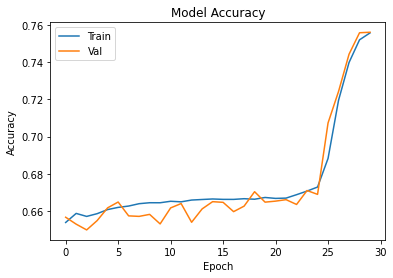

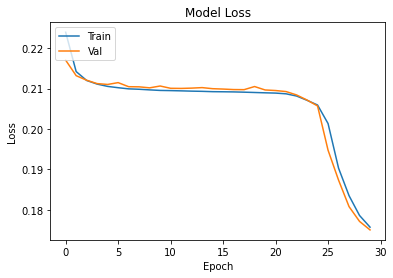

In [0]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

In [0]:
scores = model.evaluate(X_test, y_test, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 76.03%


In [0]:
scores = model.evaluate(test_X, test_Y, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X1, test_Y1, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X2, test_Y2, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X3, test_Y3, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X4, test_Y4, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X5, test_Y5, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X6, test_Y6, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 60.13%
accuracy: 63.03%
accuracy: 62.79%
accuracy: 63.95%
accuracy: 63.17%
accuracy: 60.69%
accuracy: 45.42%


4-Layer Neural Network



In [0]:
#4layer
model = Sequential()
n_cols = X_train.shape[1]
n_cols
model.add(Dense(8, activation='relu', input_shape=(n_cols,)))
model.add(Dense(4, activation='relu'))
model.add(Dense(2, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='sgd', loss='mean_squared_error', metrics=['accuracy'])
early_stopping_monitor = EarlyStopping(patience=20)
history = model.fit(X_train, y_train, epochs=30, validation_split=0.2)

Train on 190263 samples, validate on 47566 samples
Epoch 1/30
190263/190263 [==============================] - 7s 37us/step - loss: 0.2468 - accuracy: 0.5404 - val_loss: 0.2421 - val_accuracy: 0.5889
Epoch 2/30
190263/190263 [==============================] - 7s 38us/step - loss: 0.2332 - accuracy: 0.6218 - val_loss: 0.2239 - val_accuracy: 0.6497
Epoch 3/30
190263/190263 [==============================] - 7s 38us/step - loss: 0.2173 - accuracy: 0.6584 - val_loss: 0.2143 - val_accuracy: 0.6573
Epoch 4/30
190263/190263 [==============================] - 7s 38us/step - loss: 0.2113 - accuracy: 0.6627 - val_loss: 0.2101 - val_accuracy: 0.6579
Epoch 5/30
190263/190263 [==============================] - 7s 38us/step - loss: 0.2073 - accuracy: 0.6751 - val_loss: 0.2061 - val_accuracy: 0.6759
Epoch 6/30
190263/190263 [==============================] - 7s 38us/step - loss: 0.2027 - accuracy: 0.6898 - val_loss: 0.2009 - val_accuracy: 0.6903
Epoch 7/30
190263/190263 [=============================

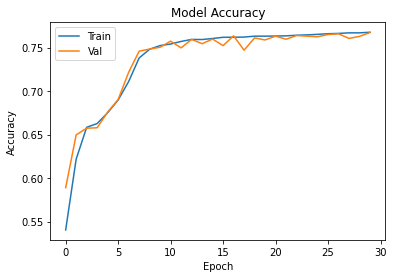

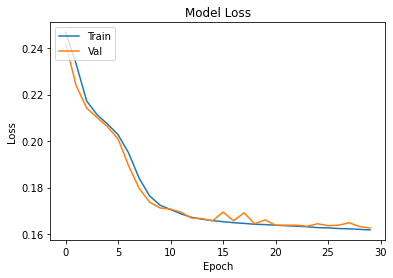

In [0]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

In [0]:
scores = model.evaluate(X_test, y_test, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 77.19%


In [0]:
scores = model.evaluate(test_X, test_Y, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X1, test_Y1, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X2, test_Y2, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X3, test_Y3, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X4, test_Y4, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X5, test_Y5, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X6, test_Y6, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 61.51%
accuracy: 63.18%
accuracy: 62.82%
accuracy: 62.59%
accuracy: 62.02%
accuracy: 60.64%
accuracy: 77.24%


5-Layer Neural Network Optimized

In [0]:
#5layer
model = Sequential()
n_cols = X_train.shape[1]
model.add(Dense(32, input_shape=(n_cols,),kernel_initializer='RandomUniform'))
model.add(PReLU())
model.add(BatchNormalization())
model.add(Dense(16))
model.add(PReLU())
model.add(BatchNormalization())
model.add(Dense(8))
model.add(PReLU())
model.add(BatchNormalization())
model.add(Dense(4))
model.add(PReLU())
model.add(BatchNormalization())
model.add(Dropout(0.001,seed=5))
model.add(Dense(1, activation='hard_sigmoid', kernel_initializer = "RandomUniform"))
opt = SGD(lr=0.02, momentum=0.9)
model.compile(optimizer=opt, loss='mean_squared_error', metrics=['accuracy'])
early_stopping_monitor = EarlyStopping(patience=20)
history = model.fit(X_train, y_train, epochs=100, validation_split=0.2)

Train on 190263 samples, validate on 47566 samples
Epoch 1/100
190263/190263 [==============================] - 14s 74us/step - loss: 0.1777 - accuracy: 0.7361 - val_loss: 0.1616 - val_accuracy: 0.7632
Epoch 2/100
190263/190263 [==============================] - 14s 71us/step - loss: 0.1668 - accuracy: 0.7545 - val_loss: 0.1631 - val_accuracy: 0.7609
Epoch 3/100
190263/190263 [==============================] - 14s 71us/step - loss: 0.1617 - accuracy: 0.7617 - val_loss: 0.1479 - val_accuracy: 0.7844
Epoch 4/100
190263/190263 [==============================] - 14s 75us/step - loss: 0.1579 - accuracy: 0.7709 - val_loss: 0.1508 - val_accuracy: 0.7854
Epoch 5/100
190263/190263 [==============================] - 14s 72us/step - loss: 0.1534 - accuracy: 0.7782 - val_loss: 0.1399 - val_accuracy: 0.8012
Epoch 6/100
190263/190263 [==============================] - 14s 73us/step - loss: 0.1500 - accuracy: 0.7838 - val_loss: 0.1422 - val_accuracy: 0.7973
Epoch 7/100
190263/190263 [================

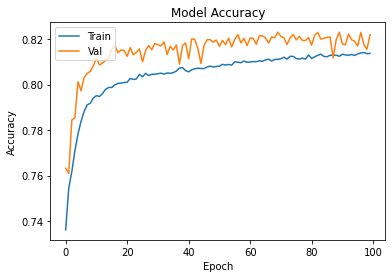

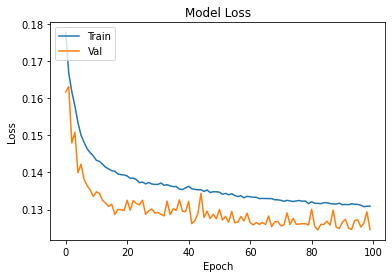

In [0]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

In [0]:
scores = model.evaluate(X_test, y_test, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 82.55%


In [0]:
scores = model.evaluate(test_X, test_Y, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X1, test_Y1, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X2, test_Y2, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X3, test_Y3, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X4, test_Y4, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X5, test_Y5, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X6, test_Y6, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 56.27%
accuracy: 57.60%
accuracy: 57.89%
accuracy: 56.28%
accuracy: 56.94%
accuracy: 55.17%
accuracy: 49.00%


In [0]:
#6layer
model = Sequential()
n_cols = X_train.shape[1]
model.add(Dense(32, input_shape=(n_cols,),kernel_initializer='RandomUniform'))
model.add(PReLU())
model.add(BatchNormalization())
model.add(Dense(16))
model.add(PReLU())
model.add(BatchNormalization())
model.add(Dense(8))
model.add(PReLU())
model.add(BatchNormalization())
model.add(Dense(4))
model.add(PReLU())
model.add(Dense(2))
model.add(PReLU())
model.add(BatchNormalization())
model.add(Dropout(0.001,seed=5))
model.add(Dense(1, activation='hard_sigmoid', kernel_initializer = "RandomUniform"))
opt = SGD(lr=0.02, momentum=0.9)
model.compile(optimizer=opt, loss='mean_squared_error', metrics=['accuracy'])
early_stopping_monitor = EarlyStopping(patience=20)
history = model.fit(X_train, y_train, epochs=50, validation_split=0.2)

Train on 190263 samples, validate on 47566 samples
Epoch 1/50
190263/190263 [==============================] - 15s 80us/step - loss: 0.1763 - accuracy: 0.7379 - val_loss: 0.1668 - val_accuracy: 0.7456
Epoch 2/50
190263/190263 [==============================] - 15s 77us/step - loss: 0.1670 - accuracy: 0.7515 - val_loss: 0.1570 - val_accuracy: 0.7571
Epoch 3/50
190263/190263 [==============================] - 15s 76us/step - loss: 0.1625 - accuracy: 0.7600 - val_loss: 0.1555 - val_accuracy: 0.7645
Epoch 4/50
190263/190263 [==============================] - 14s 75us/step - loss: 0.1592 - accuracy: 0.7666 - val_loss: 0.1520 - val_accuracy: 0.7746
Epoch 5/50
190263/190263 [==============================] - 14s 74us/step - loss: 0.1562 - accuracy: 0.7714 - val_loss: 0.1441 - val_accuracy: 0.7896
Epoch 6/50
190263/190263 [==============================] - 14s 72us/step - loss: 0.1531 - accuracy: 0.7779 - val_loss: 0.1388 - val_accuracy: 0.8040
Epoch 7/50
190263/190263 [=======================

In [0]:
scores = model.evaluate(X_test, y_test, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 82.64%


In [0]:
scores = model.evaluate(test_X, test_Y, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X1, test_Y1, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X2, test_Y2, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X3, test_Y3, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X4, test_Y4, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X5, test_Y5, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X6, test_Y6, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 53.30%
accuracy: 55.05%
accuracy: 55.36%
accuracy: 54.70%
accuracy: 54.34%
accuracy: 52.59%
accuracy: 62.17%


Decision Tree Classifier

In [0]:
#decisiontreee
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

In [0]:
dt = DecisionTreeClassifier(max_depth=24,max_features=24,random_state = 42)
dt.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=24, max_features=24, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

In [0]:
y_pred_dt= dt.predict(X_test)

In [0]:
dt_score_train = dt.score(X_train,y_train)
print("Train Prediction Score",dt_score_train*100)
dt_score_test = accuracy_score(y_test,y_pred_dt)
print("Test Prediction Score",dt_score_test*100)

Train Prediction Score 96.80610859062604
Test Prediction Score 92.97823673853813


In [0]:
y_pred_dt_test= dt.predict(test_X)
dt_score_test = accuracy_score(test_Y,y_pred_dt_test)
print("Test Prediction Score",dt_score_test*100)
y_pred_dt_test= dt.predict(test_X1)
dt_score_test = accuracy_score(test_Y1,y_pred_dt_test)
print("Test Prediction Score",dt_score_test*100)
y_pred_dt_test= dt.predict(test_X2)
dt_score_test = accuracy_score(test_Y2,y_pred_dt_test)
print("Test Prediction Score",dt_score_test*100)
y_pred_dt_test= dt.predict(test_X3)
dt_score_test = accuracy_score(test_Y3,y_pred_dt_test)
print("Test Prediction Score",dt_score_test*100)
y_pred_dt_test= dt.predict(test_X4)
dt_score_test = accuracy_score(test_Y4,y_pred_dt_test)
print("Test Prediction Score",dt_score_test*100)
y_pred_dt_test= dt.predict(test_X5)
dt_score_test = accuracy_score(test_Y5,y_pred_dt_test)
print("Test Prediction Score",dt_score_test*100)
y_pred_dt_test= dt.predict(test_X6)
dt_score_test = accuracy_score(test_Y6,y_pred_dt_test)
print("Test Prediction Score",dt_score_test*100)

Test Prediction Score 44.36333333333333
Test Prediction Score 46.10333333333333
Test Prediction Score 45.61666666666667
Test Prediction Score 44.77333333333333
Test Prediction Score 45.873333333333335
Test Prediction Score 43.163333333333334
Test Prediction Score 77.49743062692703


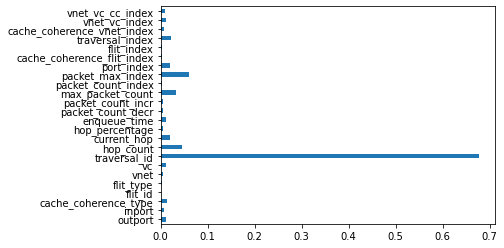

In [0]:
feat_importances = pd.Series(dt.feature_importances_, index=columns)
feat_importances.plot(kind='barh')

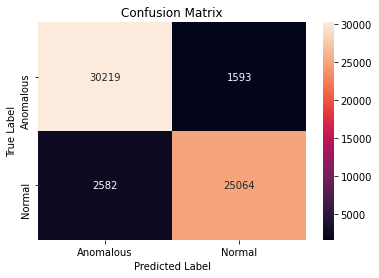

In [0]:
cm = confusion_matrix(y_test, y_pred_dt)
class_label = ["Anomalous", "Normal"]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [0]:
print(classification_report(y_test,y_pred_dt))

              precision    recall  f1-score   support

           0       0.92      0.95      0.94     31812
           1       0.94      0.91      0.92     27646

    accuracy                           0.93     59458
   macro avg       0.93      0.93      0.93     59458
weighted avg       0.93      0.93      0.93     59458



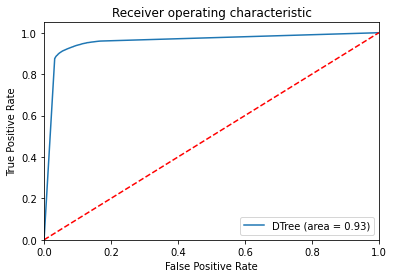

In [0]:
dt_roc_auc = roc_auc_score(y_test, y_pred_dt)
fpr, tpr, thresholds = roc_curve(y_test, dt.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='DTree (area = %0.2f)' % dt_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('DT_ROC')
plt.show()

Random Forest Classifier

In [0]:
#randomforest
from sklearn.ensemble import RandomForestClassifier

In [0]:
rf = RandomForestClassifier(max_depth=24,max_features=24,n_estimators=125,random_state=42)
rf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=24, max_features=24,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=125,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [0]:
y_pred_rf= rf.predict(X_test)

In [0]:
rf_score_train = rf.score(X_train,y_train)
print("Train Prediction Score",rf_score_train*100)
rf_score_test = accuracy_score(y_test,y_pred_rf)
print("Test Prediction Score",rf_score_test*100)

Train Prediction Score 98.80250095656965
Test Prediction Score 94.14040162803997


In [0]:
y_pred_rf_test= rf.predict(test_X)
rf_score_test = accuracy_score(test_Y,y_pred_rf_test)
print("Test Prediction Score",rf_score_test*100)
y_pred_rf_test= rf.predict(test_X1)
rf_score_test = accuracy_score(test_Y1,y_pred_rf_test)
print("Test Prediction Score",rf_score_test*100)
y_pred_rf_test= rf.predict(test_X2)
rf_score_test = accuracy_score(test_Y2,y_pred_rf_test)
print("Test Prediction Score",rf_score_test*100)
y_pred_rf_test= rf.predict(test_X3)
rf_score_test = accuracy_score(test_Y3,y_pred_rf_test)
print("Test Prediction Score",rf_score_test*100)
y_pred_rf_test= rf.predict(test_X4)
rf_score_test = accuracy_score(test_Y4,y_pred_rf_test)
print("Test Prediction Score",rf_score_test*100)
y_pred_rf_test= rf.predict(test_X5)
rf_score_test = accuracy_score(test_Y5,y_pred_rf_test)
print("Test Prediction Score",rf_score_test*100)
y_pred_rf_test= rf.predict(test_X6)
rf_score_test = accuracy_score(test_Y6,y_pred_rf_test)
print("Test Prediction Score",rf_score_test*100)

Test Prediction Score 45.45666666666667
Test Prediction Score 47.449999999999996
Test Prediction Score 47.24333333333333
Test Prediction Score 46.093333333333334
Test Prediction Score 46.82333333333333
Test Prediction Score 44.06
Test Prediction Score 78.70503597122303


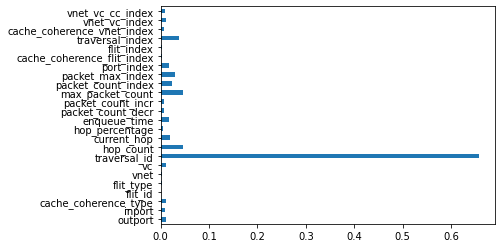

In [0]:
feat_importances = pd.Series(rf.feature_importances_, index=columns)
feat_importances.plot(kind='barh')

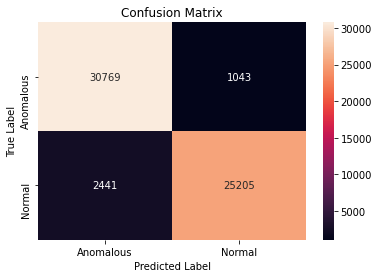

In [0]:
cm = confusion_matrix(y_test, y_pred_rf)
class_label = ["Anomalous", "Normal"]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [0]:
print(classification_report(y_test,y_pred_rf))

              precision    recall  f1-score   support

           0       0.93      0.97      0.95     31812
           1       0.96      0.91      0.94     27646

    accuracy                           0.94     59458
   macro avg       0.94      0.94      0.94     59458
weighted avg       0.94      0.94      0.94     59458



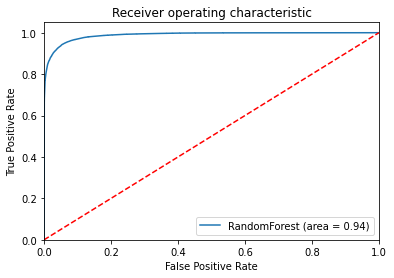

In [0]:
rf_roc_auc = roc_auc_score(y_test, y_pred_rf)
fpr, tpr, thresholds = roc_curve(y_test, rf.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='RandomForest (area = %0.2f)' % rf_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('RF_ROC')
plt.show()

XGBoost Classifier

In [0]:
#xgboost
from xgboost import XGBClassifier
from xgboost import plot_importance

In [0]:
xgbc = XGBClassifier(max_depth=24,min_child_weight=1,n_estimators=500,random_state=42,learning_rate=0.2)
xgbc.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.2, max_delta_step=0, max_depth=24,
              min_child_weight=1, missing=None, n_estimators=500, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [0]:
y_pred_xgbc= xgbc.predict(X_test)

In [0]:
xgbc_score_train = xgbc.score(X_train,y_train)
print("Train Prediction Score",xgbc_score_train*100)
xgbc_score_test = accuracy_score(y_test,y_pred_xgbc)
print("Test Prediction Score",xgbc_score_test*100)

Train Prediction Score 99.65395305030084
Test Prediction Score 96.3100003363719


In [0]:
y_pred_xgbc_test= xgbc.predict(test_X)
xgbc_score_test = accuracy_score(test_Y,y_pred_xgbc_test)
print("Test Prediction Score",xgbc_score_test*100)
y_pred_xgbc_test= xgbc.predict(test_X1)
xgbc_score_test = accuracy_score(test_Y1,y_pred_xgbc_test)
print("Test Prediction Score",xgbc_score_test*100)
y_pred_xgbc_test= xgbc.predict(test_X2)
xgbc_score_test = accuracy_score(test_Y2,y_pred_xgbc_test)
print("Test Prediction Score",xgbc_score_test*100)
y_pred_xgbc_test= xgbc.predict(test_X3)
xgbc_score_test = accuracy_score(test_Y3,y_pred_xgbc_test)
print("Test Prediction Score",xgbc_score_test*100)
y_pred_xgbc_test= xgbc.predict(test_X4)
xgbc_score_test = accuracy_score(test_Y4,y_pred_xgbc_test)
print("Test Prediction Score",xgbc_score_test*100)
y_pred_xgbc_test= xgbc.predict(test_X5)
xgbc_score_test = accuracy_score(test_Y5,y_pred_xgbc_test)
print("Test Prediction Score",xgbc_score_test*100)
y_pred_xgbc_test= xgbc.predict(test_X6)
xgbc_score_test = accuracy_score(test_Y6,y_pred_xgbc_test)
print("Test Prediction Score",xgbc_score_test*100)

Test Prediction Score 46.50333333333334
Test Prediction Score 47.39666666666666
Test Prediction Score 47.986666666666665
Test Prediction Score 46.17333333333333
Test Prediction Score 46.56
Test Prediction Score 43.35
Test Prediction Score 71.06885919835561


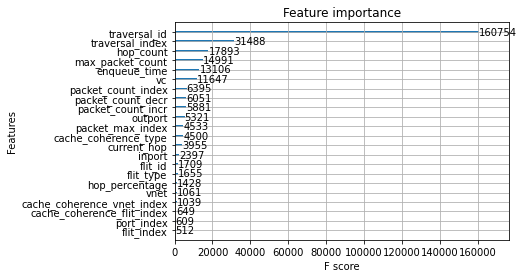

In [0]:
plot_importance(xgbc)
plt.show()

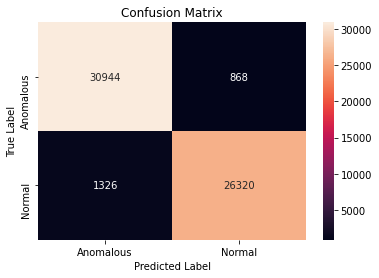

In [0]:
cm = confusion_matrix(y_test, y_pred_xgbc)
class_label = ["Anomalous", "Normal"]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [0]:
print(classification_report(y_test,y_pred_xgbc))

              precision    recall  f1-score   support

           0       0.96      0.97      0.97     31812
           1       0.97      0.95      0.96     27646

    accuracy                           0.96     59458
   macro avg       0.96      0.96      0.96     59458
weighted avg       0.96      0.96      0.96     59458



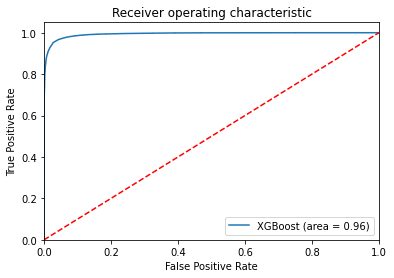

In [0]:
xgb_roc_auc = roc_auc_score(y_test, y_pred_xgbc)
fpr, tpr, thresholds = roc_curve(y_test, xgbc.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='XGBoost (area = %0.2f)' % xgb_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('XGB_ROC')
plt.show()

LightGBM Classifier

In [0]:
#lightgbm
import lightgbm as lgb

In [0]:
gbm = lgb.LGBMClassifier(learning_rate = 0.6,  n_estimators = 500, max_depth = 24, random_state=42, min_child_weight=1,metric='binary',boosting_type = 'dart')
gbm.fit(X_train, y_train)

LGBMClassifier(boosting_type='dart', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.6, max_depth=24,
               metric='binary', min_child_samples=20, min_child_weight=1,
               min_split_gain=0.0, n_estimators=500, n_jobs=-1, num_leaves=31,
               objective=None, random_state=42, reg_alpha=0.0, reg_lambda=0.0,
               silent=True, subsample=1.0, subsample_for_bin=200000,
               subsample_freq=0)

In [0]:
y_pred_gbm= gbm.predict(X_test)

In [0]:
gbm_score_train = gbm.score(X_train,y_train)
print("Train Prediction Score",gbm_score_train*100)
gbm_score_test = accuracy_score(y_test,y_pred_gbm)
print("Test Prediction Score",gbm_score_test*100)

Train Prediction Score 88.79741326751574
Test Prediction Score 88.17316425039525


In [0]:
y_pred_gbm_test = gbm.predict(test_X)
gbm_score_test = accuracy_score(test_Y,y_pred_gbm_test)
print("Test Prediction Score",gbm_score_test*100)
y_pred_gbm_test = gbm.predict(test_X1)
gbm_score_test = accuracy_score(test_Y1,y_pred_gbm_test)
print("Test Prediction Score",gbm_score_test*100)
y_pred_gbm_test = gbm.predict(test_X2)
gbm_score_test = accuracy_score(test_Y2,y_pred_gbm_test)
print("Test Prediction Score",gbm_score_test*100)
y_pred_gbm_test = gbm.predict(test_X3)
gbm_score_test = accuracy_score(test_Y3,y_pred_gbm_test)
print("Test Prediction Score",gbm_score_test*100)
y_pred_gbm_test = gbm.predict(test_X4)
gbm_score_test = accuracy_score(test_Y4,y_pred_gbm_test)
print("Test Prediction Score",gbm_score_test*100)
y_pred_gbm_test = gbm.predict(test_X5)
gbm_score_test = accuracy_score(test_Y5,y_pred_gbm_test)
print("Test Prediction Score",gbm_score_test*100)
y_pred_gbm_test = gbm.predict(test_X6)
gbm_score_test = accuracy_score(test_Y6,y_pred_gbm_test)
print("Test Prediction Score",gbm_score_test*100)

Test Prediction Score 51.6
Test Prediction Score 50.60666666666667
Test Prediction Score 51.580000000000005
Test Prediction Score 50.263333333333335
Test Prediction Score 52.093333333333334
Test Prediction Score 48.04666666666667
Test Prediction Score 67.85200411099692


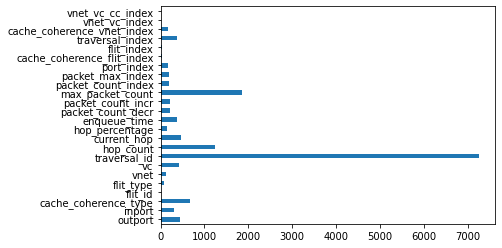

In [0]:
feat_importances = pd.Series(gbm.feature_importances_, index=columns)
feat_importances.plot(kind='barh')

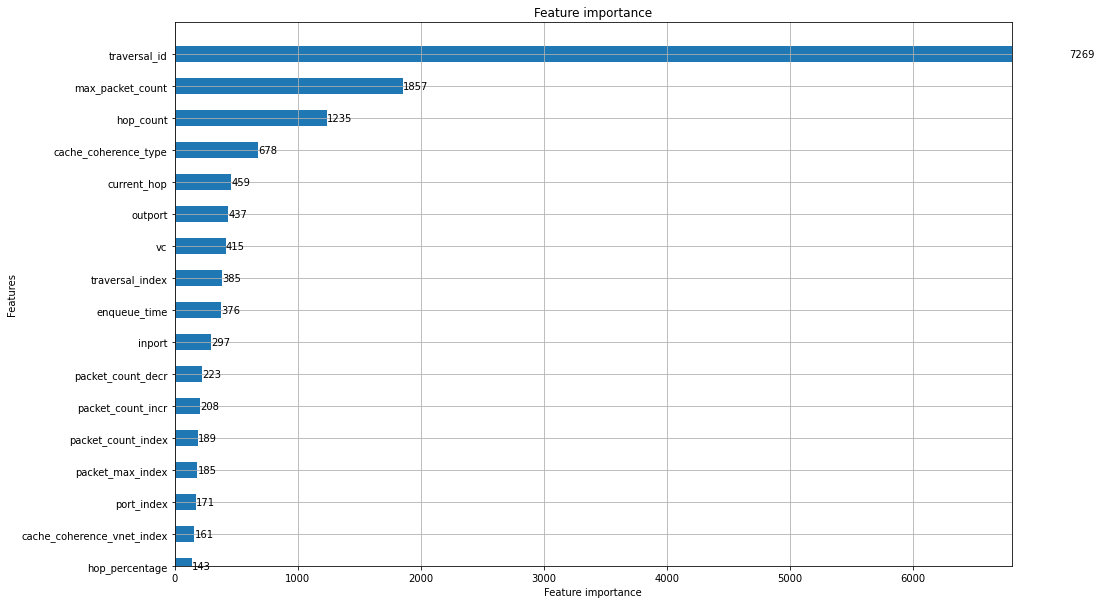

In [0]:
ax = lgb.plot_importance(gbm, height = 0.5, max_num_features = 17, xlim = (0,6800), ylim = (0,17), figsize = (15,10))
plt.show()

In [0]:
sorted(gbm.feature_importances_,reverse=True)

[7269,
 1857,
 1235,
 678,
 459,
 437,
 415,
 385,
 376,
 297,
 223,
 208,
 189,
 185,
 171,
 161,
 143,
 130,
 86,
 41,
 37,
 18,
 0,
 0]

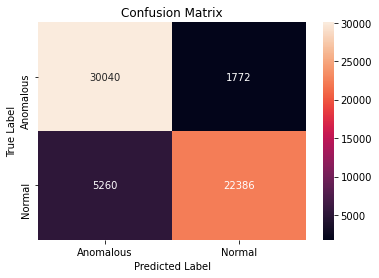

In [0]:
cm = confusion_matrix(y_test, y_pred_gbm)
class_label = ["Anomalous", "Normal"]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [0]:
print(classification_report(y_test,y_pred_gbm))

              precision    recall  f1-score   support

           0       0.85      0.94      0.90     31812
           1       0.93      0.81      0.86     27646

    accuracy                           0.88     59458
   macro avg       0.89      0.88      0.88     59458
weighted avg       0.89      0.88      0.88     59458



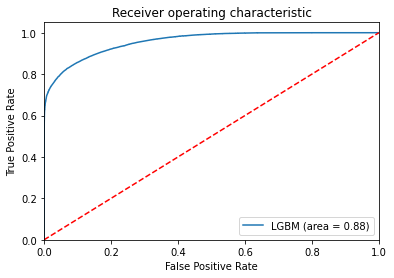

In [0]:
lgbm_roc_auc = roc_auc_score(y_test, y_pred_gbm)
fpr, tpr, thresholds = roc_curve(y_test, gbm.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='LGBM (area = %0.2f)' % lgbm_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('LGBM_ROC')
plt.show()